# A Walk through PyStyl

Experiments in stylometry typically kick off with creating a corpus, or the collection of texts which we would like to compare. In pystyl, we use the Corpus class to represent such a text collection: 

In [1]:
%load_ext autoreload 
%autoreload 1
%matplotlib inline
import matplotlib.pyplot as plt

# Uncomment these lines to have more readable figures
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 200

from pystyl.corpus import Corpus
corpus = Corpus(language='hu')

Specifying a language such as `'en'` (English) is optional. Adding texts from a directory to the corpus is easy: 

In [2]:
corpus.add_directory(directory='../corpus')

By default, this function assumes that all texts under this directory have been encoded in UTF-8 and that they have a `.txt` extension. Additionally, the syntax of the filename should be `<category>_<title>.txt`, where category is a label indicates e.g. a text's authorship, genre or date of composition. In our case, this directory looked like:

In [3]:
ls ../corpus/

angyalosi_all.txt               jokai_szekelyek.txt
bakcsiferencz_adjonisten.txt    jokai_tekintetesasszony.txt
bakcsiferencz_eljegyzes.txt     jokai_tizennegyedik.txt
bakcsiferencz_tarkavilág.txt    jokai_véreskenyer.txt
jokai_azenszinpadieletem.txt    mikszath_hogynemdiktalktakvissza.txt
jokai_azokaszegenyhonvedek.txt  mikszath_mialelketmegmergezi.txt
jokai_ezekakedelyesrablok.txt   pecsiimre_pecsiimre.txt
jokai_feketesereg.txt           purganyi_purganyi.txt
jokai_honvedek1868ban.txt       sarvary_sarvary.txt
jokai_miazamunkaskez.txt        ujkeri_aszivmegkoveteleijogait.txt
jokai_párbajacsatatéren.txt     viraghalmi_kem.txt
jokai_parbajIstennel.txt        viraghalmi_maradjakaptadnal.txt


Our corpus currently holds these 7 texts in their raw form:

In [4]:
print(corpus)

<Corpus(24 texts)> 
Untokenized texts:

	- all	(cat: angyalosi):	'\ufeffKiüldözték a világból.\r\n   Sz'[...]
	- adjonisten	(cat: bakcsiferencz):	'Egy rövid emberélet elég hossz'[...]
	- eljegyzes	(cat: bakcsiferencz):	'\ufeffOlyan mélabus hangon döngött '[...]
	- tarkavilág	(cat: bakcsiferencz):	'A ki azt gondolja, hogy a buda'[...]
	- azenszinpadieletem	(cat: jokai):	'Minthogy tartok töle, hogy ezt'[...]
	- azokaszegenyhonvedek	(cat: jokai):	'\ufeffAzok a szegény honvédek.\r\n   '[...]
	- ezekakedelyesrablok	(cat: jokai):	'\ufeffEzek a kedélyes rablók.\r\n   H'[...]
	- feketesereg	(cat: jokai):	'„Meghalt Mátyás király, oda az'[...]
	- honvedek1868ban	(cat: jokai):	'\ufeff\r\nA honvédek 1868-ban. \r\nÍrta'[...]
	- miazamunkaskez	(cat: jokai):	'\ufeffMi az a munkás kéz ?\r\n(Mutatv'[...]
	- parbajIstennel	(cat: jokai):	'\ufeff   Egy naplemenet a sivatagba'[...]
	- párbajacsatatéren	(cat: jokai):	'Babért a múltnak!\r\nHa minden l'[...]
	- szekelyek	(cat: jokai):	'Van egy magyar népfaj, 

In stylometry, it typical to preprocess your corpus and remove, let's say, punctuation and lowercase texts. In pystyl, we achieve this via the `preprocess()` method, where the `alpha_only` parameter controls whether we only wish to keep alphabetic symbols:

In [5]:
corpus.preprocess(alpha_only=True, lowercase=True)
print(corpus)

<Corpus(24 texts)> 
Untokenized texts:

	- all	(cat: angyalosi):	'kiüldözték a világból\r\n   szeg'[...]
	- adjonisten	(cat: bakcsiferencz):	'egy rövid emberélet elég hossz'[...]
	- eljegyzes	(cat: bakcsiferencz):	'olyan mélabus hangon döngött a'[...]
	- tarkavilág	(cat: bakcsiferencz):	'a ki azt gondolja hogy a budai'[...]
	- azenszinpadieletem	(cat: jokai):	'minthogy tartok töle hogy ezt '[...]
	- azokaszegenyhonvedek	(cat: jokai):	'azok a szegény honvédek\r\n   a '[...]
	- ezekakedelyesrablok	(cat: jokai):	'ezek a kedélyes rablók\r\n   ha '[...]
	- feketesereg	(cat: jokai):	'meghalt mátyás király oda az i'[...]
	- honvedek1868ban	(cat: jokai):	'\r\na honvédek ban \r\nírta jókai '[...]
	- miazamunkaskez	(cat: jokai):	'mi az a munkás kéz \r\nmutatvány'[...]
	- parbajIstennel	(cat: jokai):	'   egy naplemenet a sivatagban'[...]
	- párbajacsatatéren	(cat: jokai):	'babért a múltnak\r\nha minden le'[...]
	- szekelyek	(cat: jokai):	'van egy magyar népfaj mely a l'[...]
	- tekintetesasszony	

Now, the corpus is ready to be tokenized, which is helpful if we want to start counting words:

In [6]:
corpus.tokenize()
print(corpus)

<Corpus(24 texts)> 
Tokenized texts:
	- all	(cat: angyalosi):	'kiüldözték a világból szegény becsületes karika márton nem születik több'[...]
	- adjonisten	(cat: bakcsiferencz):	'egy rövid emberélet elég hosszu arra hogy sokat szenvedjünk s'[...]
	- eljegyzes	(cat: bakcsiferencz):	'olyan mélabus hangon döngött a nagy harang karácson napján mintha'[...]
	- tarkavilág	(cat: bakcsiferencz):	'a ki azt gondolja hogy a budai tébolydán a lipótmezei'[...]
	- azenszinpadieletem	(cat: jokai):	'minthogy tartok töle hogy ezt a részét a biografiámnak senki'[...]
	- azokaszegenyhonvedek	(cat: jokai):	'azok a szegény honvédek a ki nem tud imádkozni ne'[...]
	- ezekakedelyesrablok	(cat: jokai):	'ezek a kedélyes rablók ha szomoru nem volna a tárgy'[...]
	- feketesereg	(cat: jokai):	'meghalt mátyás király oda az igazság kiálta fel a nép'[...]
	- honvedek1868ban	(cat: jokai):	'a honvédek ban írta jókai mór a ki nem tud'[...]
	- miazamunkaskez	(cat: jokai):	'mi az a munkás kéz mutatvány a munkások ujsága 

The corpus now holds our texts in a tokenized form. Of course, the novels wildly vary in length. If we would like to split these into shorter segments of e.g. 10,000 words, we can use the `segment()` function.

In [7]:
corpus.segment(segment_size=2000)
print(corpus)
help(corpus.segment)

<Corpus(37 texts)> 
Tokenized texts:
	- adjonisten_1	(cat: bakcsiferencz):	'egy rövid emberélet elég hosszu arra hogy sokat szenvedjünk s'[...]
	- adjonisten_2	(cat: bakcsiferencz):	'mint kitelhetett a pohárköszöntésnek vége hossza nem volt ittak a'[...]
	- adjonisten_3	(cat: bakcsiferencz):	'nem lehetett látni hát még a dagasztó tekenő keverő lapoczka'[...]
	- adjonisten_4	(cat: bakcsiferencz):	'fegyver melyik hat fontos melyik huszonnégy fontos már a tartozás'[...]
	- eljegyzes_1	(cat: bakcsiferencz):	'olyan mélabus hangon döngött a nagy harang karácson napján mintha'[...]
	- azenszinpadieletem_1	(cat: jokai):	'minthogy tartok töle hogy ezt a részét a biografiámnak senki'[...]
	- feketesereg_1	(cat: jokai):	'meghalt mátyás király oda az igazság kiálta fel a nép'[...]
	- feketesereg_2	(cat: jokai):	'dunán usztak alá talán ha a drávát elérhette volna máskép'[...]
	- feketesereg_3	(cat: jokai):	'volt szemeinek álma többé mi következik még szégyen és gyalázat'[...]
	- feketesereg_4	(cat:

In stylometry, it is common to manually remove certain words, such as personal pronouns, which are more strongly tied to narrative perspective than authorial writing style. To remove these from our English texts, we can do:

In [8]:
# corpus.remove_tokens(rm_pronouns=True)
# print(corpus)

As you can see, all personal pronouns have now been removed from our corpus segments. We are now ready to `vectorize` our corpus, which means that we will represent it as as a large two-dimensional matrix in which each row represents one of our textual segments, and each individual feature (e.g. a function word frequency) is represented in a column.  

In [9]:
corpus.vectorize(mfi=100)

['a',
 'akkor',
 'alatt',
 'annak',
 'az',
 'azt',
 'aztán',
 'azután',
 'azzal',
 'azért',
 'be',
 'csak',
 'de',
 'e',
 'egy',
 'egész',
 'el',
 'előtt',
 'ember',
 'ez',
 'ezt',
 'fekete',
 'fel',
 'ha',
 'hanem',
 'hogy',
 'hol',
 'hát',
 'igen',
 'igy',
 'is',
 'isten',
 'itt',
 'jó',
 'jól',
 'kell',
 'kellett',
 'ki',
 'kis',
 'kondor',
 'két',
 'le',
 'lehet',
 'lesz',
 'lett',
 'maga',
 'magyar',
 'magát',
 'majd',
 'meg',
 'mely',
 'mert',
 'mi',
 'mig',
 'mikor',
 'mind',
 'minden',
 'mindig',
 'mint',
 'mintha',
 'mit',
 'most',
 'már',
 'még',
 'nagy',
 'nagyon',
 'ne',
 'neki',
 'nem',
 'no',
 'oda',
 'oly',
 'olyan',
 'ott',
 'pedig',
 'péter',
 'rá',
 's',
 'se',
 'sem',
 'soha',
 'sok',
 'szép',
 'szólt',
 'te',
 'ugy',
 'ur',
 'uram',
 'után',
 'vagy',
 'valami',
 'van',
 'volna',
 'volt',
 'voltak',
 'én',
 'épen',
 'és',
 'öreg',
 'ő']

As you can see, we have now included the 30 most common words in our corpus model (`mfi` stands for 'most frequent items'). These features are returned by the `vectorize()` method. Many other options are available; to extract the 50 most common character trigrams, for instance, you could run:

In [10]:
corpus.vectorize(mfi=50, ngram_type='char', ngram_size=3)

[' a ',
 ' az',
 ' cs',
 ' eg',
 ' el',
 ' fe',
 ' ha',
 ' ho',
 ' is',
 ' ke',
 ' ki',
 ' le',
 ' me',
 ' mi',
 ' ne',
 ' s ',
 ' sz',
 ' va',
 ' vo',
 'a k',
 'a m',
 'a s',
 'ak ',
 'an ',
 'az ',
 'egy',
 'ek ',
 'em ',
 'en ',
 'et ',
 'ett',
 'gy ',
 'hog',
 'is ',
 'k a',
 'lt ',
 'meg',
 'min',
 'nek',
 'nem',
 'ni ',
 'ogy',
 'olt',
 'ott',
 'sze',
 't a',
 't m',
 'tt ',
 'vol',
 'át ']

A more fundamental issue is the vectorization model we select. By default, the vectorizer will create a simple term-frequency model, which means that we will record the relative frequencies of our most frequent items in each text. In stylometry, however, there exist many more models. PyStyl also supports the `tf-idf` model (term frequency-inverse document frequency), which is commonly used in information retrieval to assign more weight to lower-frequency items. 

In [11]:
corpus.vectorize(mfi=30, vector_space='tf_idf')

['a',
 'az',
 'azt',
 'aztán',
 'csak',
 'de',
 'egy',
 'el',
 'ez',
 'ha',
 'hogy',
 'is',
 'ki',
 'meg',
 'mert',
 'mikor',
 'mint',
 'már',
 'még',
 'nem',
 'olyan',
 'pedig',
 's',
 'sem',
 'van',
 'volna',
 'volt',
 'én',
 'és',
 'ő']

PyStyl also supports the `std` model which underpins Burrows's famous Delta method (and which is typically also a solid model for other applications): 

In [12]:
corpus.vectorize(mfi=30, vector_space='tf_std')

['a',
 'az',
 'azt',
 'aztán',
 'csak',
 'de',
 'egy',
 'el',
 'ez',
 'ha',
 'hogy',
 'is',
 'ki',
 'meg',
 'mert',
 'mikor',
 'mint',
 'már',
 'még',
 'nem',
 'olyan',
 'pedig',
 's',
 'sem',
 'van',
 'volna',
 'volt',
 'én',
 'és',
 'ő']

Vectorization is a foundational issue in stylometry, since it very much controls how our analyses 'see' texts. Luckily, the vectorize() method comes with many options to control this process. With the following options, we can for install control the proportion of segments to control in how many segments a feature should minimally occur (a procedure also known as 'culling'): 

In [13]:
corpus.vectorize(mfi=30, min_df=0.80)

['a',
 'az',
 'azt',
 'aztán',
 'csak',
 'de',
 'egy',
 'el',
 'ez',
 'ha',
 'hogy',
 'is',
 'ki',
 'meg',
 'mert',
 'mikor',
 'mint',
 'már',
 'még',
 'nem',
 'olyan',
 'pedig',
 's',
 'sem',
 'van',
 'volna',
 'volt',
 'én',
 'és',
 'ő']

In [14]:
from pystyl.analysis import distance_matrix, hierarchical_clustering

In [15]:
from pystyl.visualization import scatterplot, scatterplot_3d

In [16]:
from pystyl.analysis import pca

In [17]:
pca_coor, pca_loadings = pca(corpus, nb_dimensions=2)

<Figure size 432x288 with 0 Axes>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


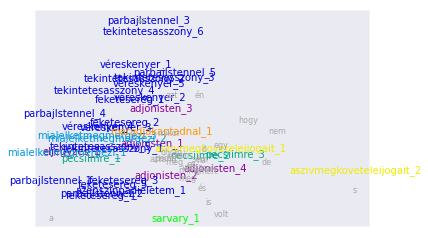

In [18]:
scatterplot(corpus, coor=pca_coor, nb_clusters=0, loadings=pca_loadings, plot_type='static',\
           save=False, show=False, return_svg=False, outputfile="/run/shm.pdf")

In [19]:
pca_coor, pca_loadings = pca(corpus, nb_dimensions=3)

<Figure size 432x288 with 0 Axes>

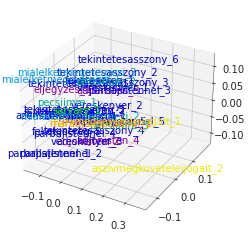

In [20]:
scatterplot_3d(corpus, coor=pca_coor, outputfile="/run/shm/3d.pdf",\
           save=True, show=False, return_svg=False)

In [21]:
from pystyl.analysis import distance_matrix

In [22]:
dm = distance_matrix(corpus, 'minmax')

In [23]:
from pystyl.visualization import clustermap

<Figure size 432x288 with 0 Axes>

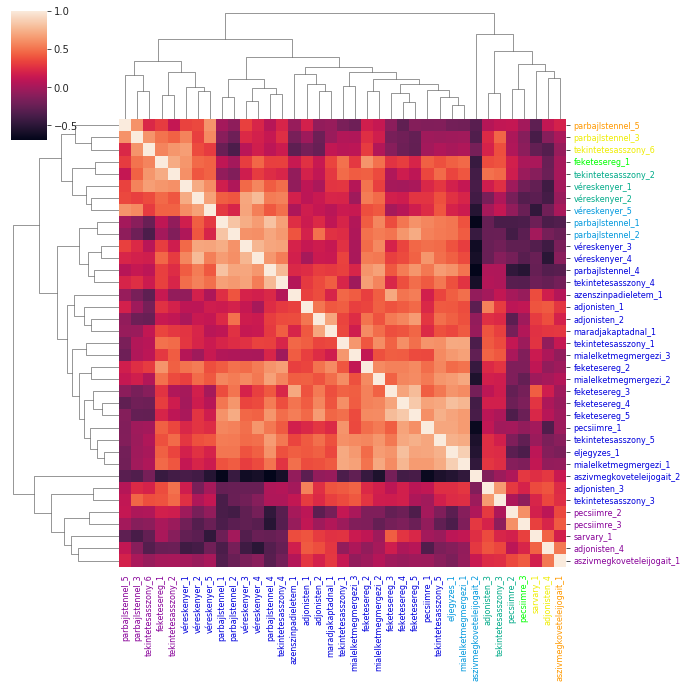

In [24]:
clustermap(corpus, distance_matrix=dm, fontsize=8, color_leafs=True,\
           outputfile='/run/shm/cm.pdf',
          show=False, save=False, return_svg=False)

In [25]:
from pystyl.analysis import hierarchical_clustering

In [26]:
cluster_tree = hierarchical_clustering(dm, linkage='ward')

In [27]:
from pystyl.visualization import scipy_dendrogram, ete_dendrogram

<Figure size 432x288 with 0 Axes>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


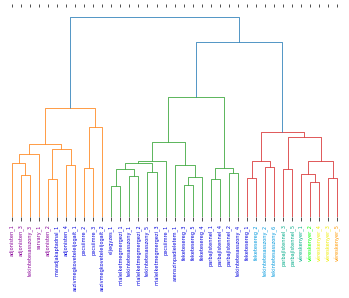

In [28]:
scipy_dendrogram(corpus=corpus, tree=cluster_tree, outputfile='~/run/shm/scipy_dendrogram.pdf',\
                 fontsize=5, color_leafs=True, show=False, save=False, return_svg=False)

In [29]:
ete_dendrogram(corpus=corpus, tree=cluster_tree, outputfile='/run/shm/ete_dendrogram.png',
               fontsize=5, color_leafs=True, show=False, save=True, return_svg=False,
               save_newick=False)

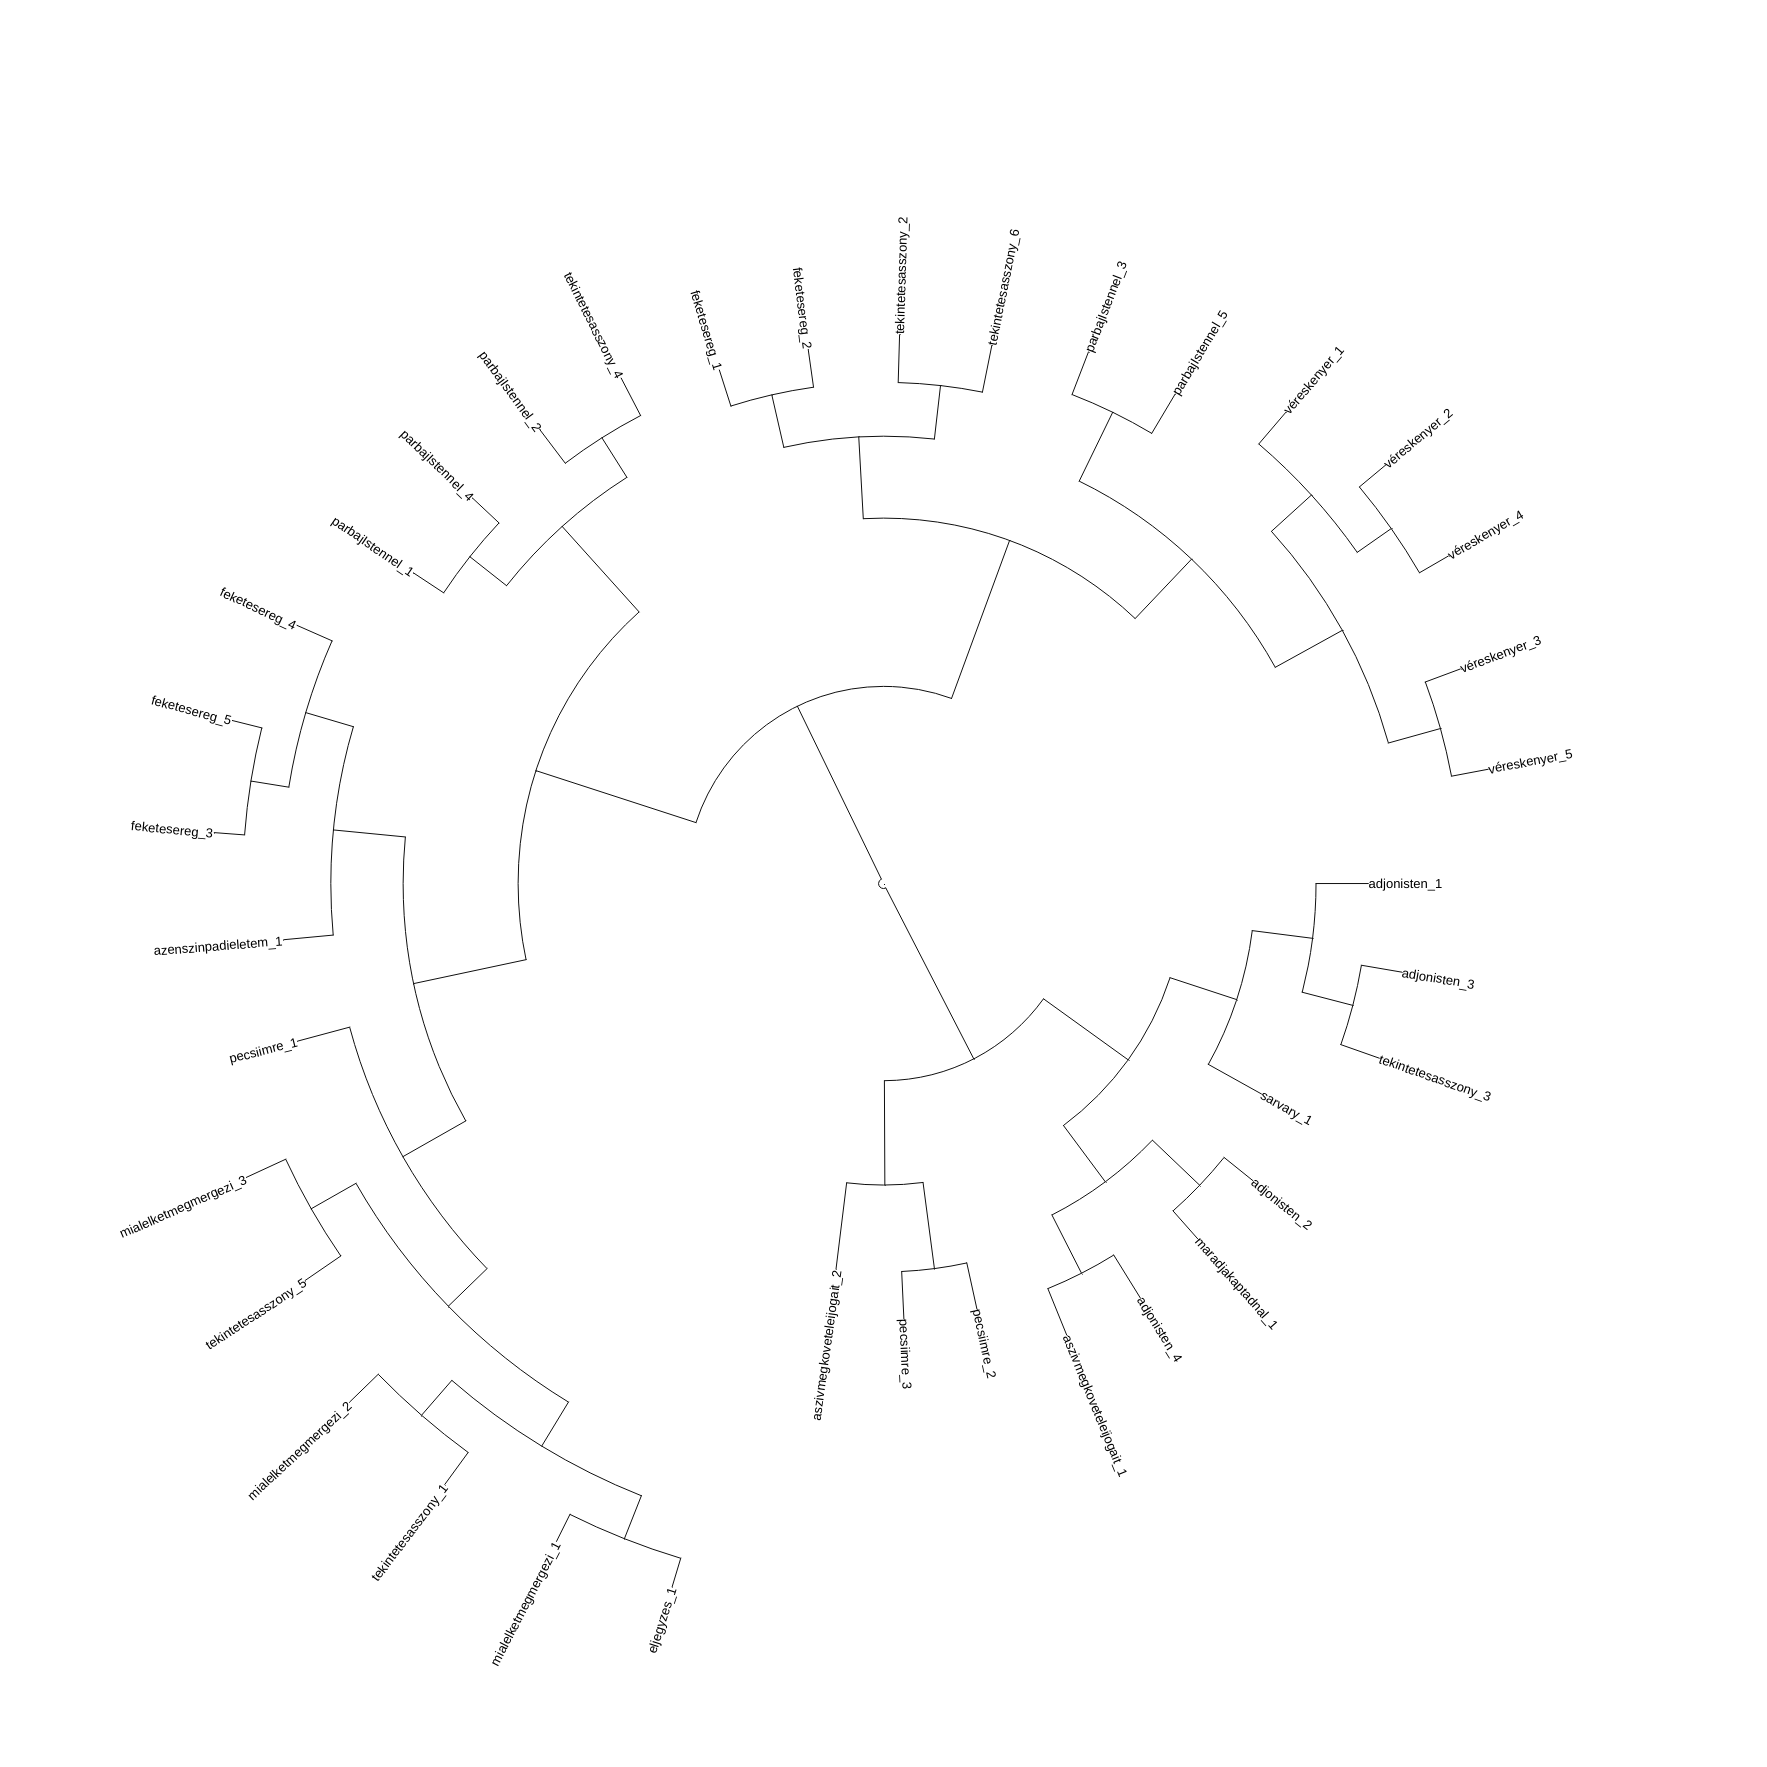

In [30]:
from IPython.display import Image
Image(filename='/run/shm/ete_dendrogram.png')